In [38]:
import pandas as pd
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style

# Maquina de Soporte Regression
Tiene distintos Kernels, por lo que tiene varias formas de utilizar
- Sirve para datos mas complejos

### Caracteristicas
- Hiperplano: La linea Recta
- Vectores: Las rectas
- Errores: Los datos que estan separados de los vectoes
  - Lo que se puede hacer es expandir los vectores para que tomen mas datos, pero puede que tengamos sobreajuste(sobreentrenar)
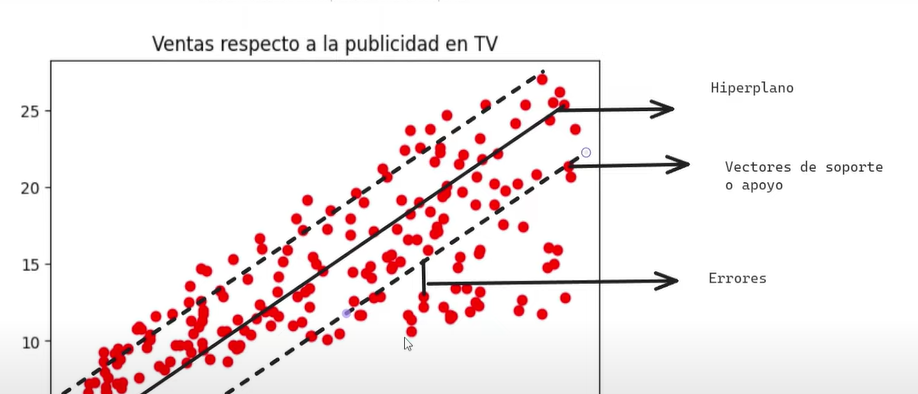

Estas rectas nos ayudan a entender mejor los datos


## Data



In [39]:
#* Cargamos los datos de la dataset
data = pd.read_csv("DATA\Advertising.csv")
data = data.iloc[:,1:] ### Sirve para eliminar la columna unnamed por que nos servira de nada
## Observar los datos
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Visualizacion de Datos

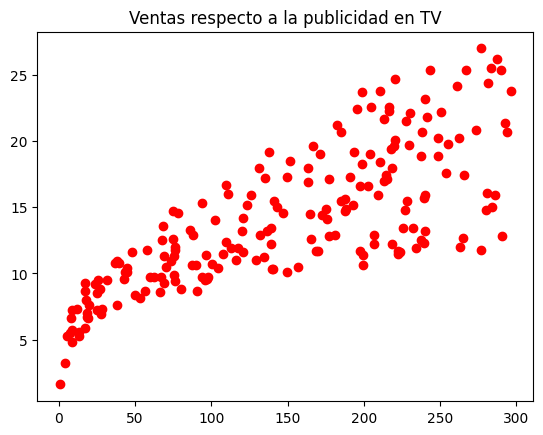

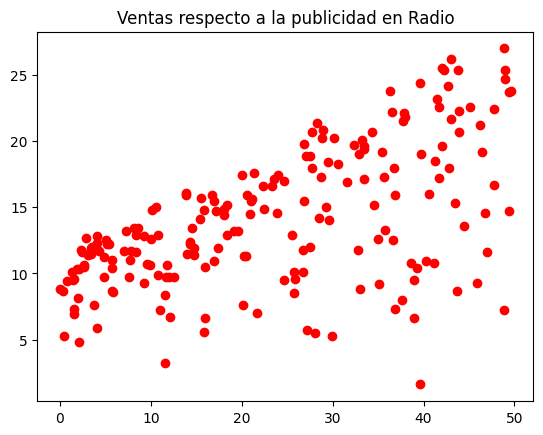

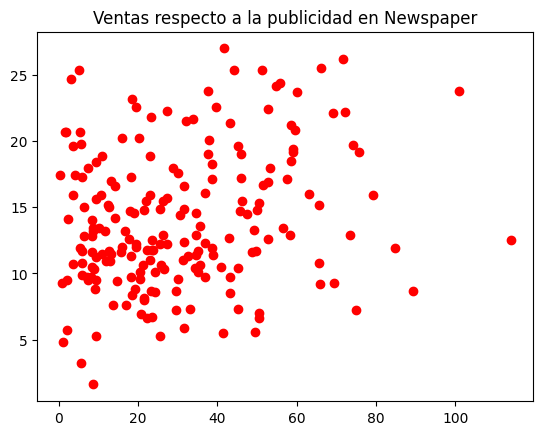

In [40]:
cols = ['TV', 'Radio', 'Newspaper']
for col in cols:
  plt.plot(data[col],data["Sales"], "ro")
  plt.title(f"Ventas respecto a la publicidad en {col}")
  plt.show()

### Entrenamiento

In [41]:
#
#* Importamos lo que necesitaremos
from sklearn.svm import SVR # El modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [42]:
## Preparamos los datos
X = data.drop(["Radio", "Sales"], axis=1).values # Eliminamos la columna Radio y Sales(y nos quedamos solo con Television y Newspaper) y lo convertimos en un array, axis = 1 es para que elimine columnas y no filas
y = data["Sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
## Entrenamiento
svr = SVR(kernel="rbf") # Podemos decirle entre linear, poly, rbf(default), etc
svr.fit(X_train, y_train)

## Prediccion
y_pred = svr.predict(X_test)


## Comparacion
print(Fore.RED + f"Reales: {y_test[:4]}" + Style.RESET_ALL)
print(Fore.BLUE + f"Predicciones: {y_pred[:4]}" + Style.RESET_ALL)

Reales: [16.9 22.4 21.4  7.3]
Predicciones: [15.92644542 17.19547972 18.032271    8.22924309]


In [44]:
### Metricas

r2 = r2_score(y_test, y_pred)
print(Fore.RED + f"El r2 es: {r2}")

El r2 es: 0.6656952068341743


### Visualizacion

## Prueba con otras caracteristicas

In [45]:
## Preparamos los datos
X = data.drop(["Newspaper", "Sales"], axis=1).values # Eliminamos la columna Radio y Sales(y nos quedamos solo con Television y Newspaper) y lo convertimos en un array, axis = 1 es para que elimine columnas y no filas
y = data["Sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
## Entrenamiento
svr = SVR(kernel="rbf") # Podemos decirle entre linear, poly, rbf(default), etc
svr.fit(X_train, y_train)

## Prediccion
y_pred = svr.predict(X_test)


## Comparacion
print(Fore.RED + f"Reales: {y_test[:4]}" + Style.RESET_ALL)
print(Fore.BLUE + f"Predicciones: {y_pred[:4]}" + Style.RESET_ALL)

Reales: [16.9 22.4 21.4  7.3]
Predicciones: [16.25106175 19.54842936 18.32663294  8.51097891]


In [53]:
### Metricas

r2 = r2_score(y_test, y_pred)
print(Fore.RED + f"El r2 es: {r2}")

El r2 es: 0.8989271754336223
